In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-bang-theory-all-seasons-dataset/dataset.csv


In [2]:
#reading the csv data using pd.read_csv()
bbt=pd.read_csv("../input/big-bang-theory-all-seasons-dataset/dataset.csv")

In [3]:
# checking the head of the data
bbt.head()

,Unnamed: 0,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions),Season
0,0,1,1,"""Pilot""",James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9.52,1
1,1,2,2,"""The Big Bran Hypothesis""",Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by...,2007-10-01,3T6601,8.58,1
2,2,3,3,"""The Fuzzy Boots Corollary""",Mark Cendrowski,Story by : Chuck LorreTeleplay by : Bill Prady...,2007-10-08,3T6602,8.36,1
3,3,4,4,"""The Luminous Fish Effect""",Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by...,2007-10-15,3T6603,8.15,1
4,4,5,5,"""The Hamburger Postulate""",Andrew D. Weyman,Story by : Jennifer GlickmanTeleplay by : Dave...,2007-10-22,3T6604,8.81,1


In [4]:
#checking the info of the data
bbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              279 non-null    int64  
 1   No.overall              279 non-null    int64  
 2   No. inseason            279 non-null    int64  
 3   Title                   279 non-null    object 
 4   Directed by             279 non-null    object 
 5   Written by              279 non-null    object 
 6   Original air date       279 non-null    object 
 7   Prod.code               279 non-null    object 
 8   U.S. viewers(millions)  279 non-null    float64
 9   Season                  279 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 21.9+ KB


In [5]:
bbt.columns

Index(['Unnamed: 0', 'No.overall', 'No. inseason', 'Title', 'Directed by',
       'Written by', 'Original air date', 'Prod.code',
       'U.S. viewers(millions)', 'Season'],
      dtype='object')

In [6]:
# fixing the datatype of Date Column to datetime format
bbt["Original air date"] = pd.to_datetime(bbt["Original air date"])

In [7]:
#checking the info again
bbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              279 non-null    int64         
 1   No.overall              279 non-null    int64         
 2   No. inseason            279 non-null    int64         
 3   Title                   279 non-null    object        
 4   Directed by             279 non-null    object        
 5   Written by              279 non-null    object        
 6   Original air date       279 non-null    datetime64[ns]
 7   Prod.code               279 non-null    object        
 8   U.S. viewers(millions)  279 non-null    float64       
 9   Season                  279 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 21.9+ KB


In [8]:
bbt.columns

Index(['Unnamed: 0', 'No.overall', 'No. inseason', 'Title', 'Directed by',
       'Written by', 'Original air date', 'Prod.code',
       'U.S. viewers(millions)', 'Season'],
      dtype='object')

In [9]:
# dropping unwanted column
bbt.drop("Unnamed: 0",axis=1,inplace=True)

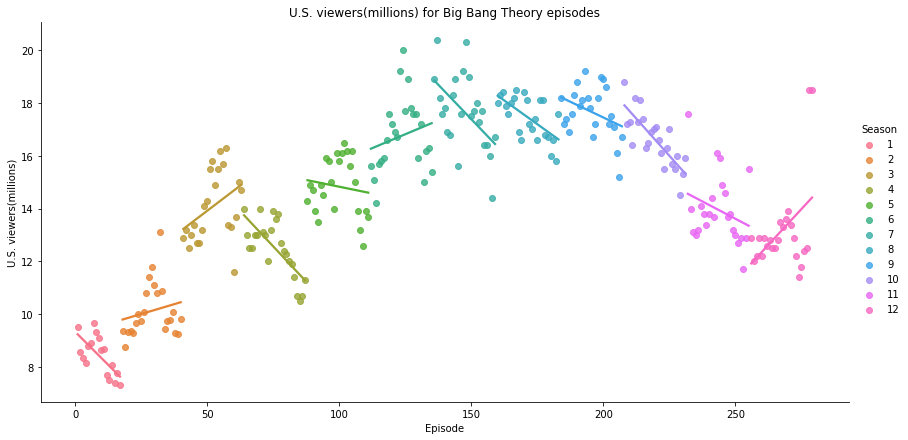

In [10]:
# Using seaborn to compare number of views along with episodes of each season 
sns.lmplot(x="No.overall", y="U.S. viewers(millions)", hue="Season", data=bbt, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.title("U.S. viewers(millions) for Big Bang Theory episodes");

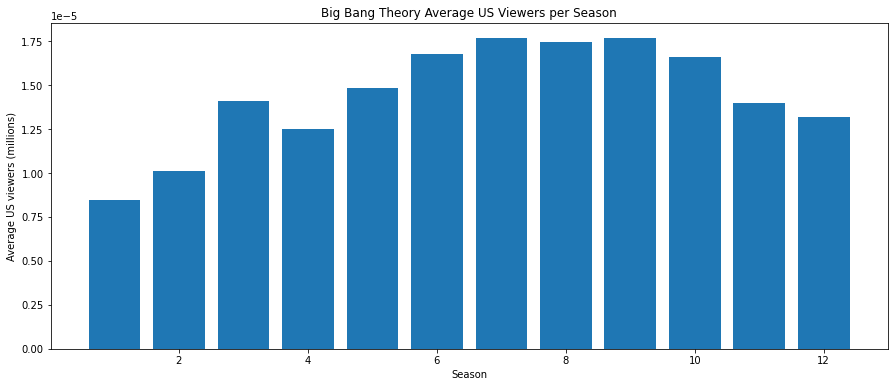

In [11]:
#checking the same in bar graph
mean_viewers = bbt.groupby(['Season'])['U.S. viewers(millions)'].mean() #calculating mean 

fig = plt.figure(figsize=(15, 6))

plt.bar(x=mean_viewers.index, height=(mean_viewers.values / 1e6)) 
plt.ylabel('Average US viewers (millions)')
plt.xlabel('Season')
plt.title('Big Bang Theory Average US Viewers per Season');

# Conclusion
After increasing each of the first three seasons, US viewership declined slightly in the fourth. Seasons 7-9 saw a rebound, however, before declining in each of the last three seasons.